# Predição Pagamento de Empréstimo Estudantil
Entre todos os setores, o setor de empréstimos tem um dos maiores usos dos métodos de análise e ciência de dados. Esse conjunto de dados fornece uma amostra do trabalho de Empréstimo para Estudantes. Isso é um problema de classificação.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

%matplotlib inline

In [7]:
#  Os dados possuem 615 linhas e 13 colunas.
data = pd.read_csv('bases/emprestimo.csv')
print(len(data), 'linhas')
data.head()

614 linhas


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# A variável "Loan_Status" é a variável explanatória que indica um bom pagador
encode = LabelEncoder()
data.Loan_Status = encode.fit_transform(data.Loan_Status)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [9]:
# Retirar o campo Loan_ID
data = data.drop(columns=['Loan_ID'], axis=1)
# Limpeza dos valores nulos
data.dropna(how='any',inplace=True)
print(len(data), 'linhas')
data.head()

480 linhas


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [10]:
# 20% para base de treino
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Loan_Status'],axis=1), data['Loan_Status'], test_size = .2)
print('shape of training data:', X_train.shape)
print('shape of testing data:', X_test.shape)

shape of training data: (384, 11)
shape of testing data: (96, 11)


In [12]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(len(X_train), 'linhas')
X_train.head()

384 linhas


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
212,7787,0.0,240.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
553,2454,2333.0,181.0,360.0,0.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
527,5285,1430.0,161.0,360.0,0.0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0
172,3522,0.0,81.0,180.0,1.0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0


In [22]:
# Executa o modelo
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
print('Acurácia:', clf.score(X_test, y_test))

Acurácia: 0.75


In [23]:
y_pred = clf.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))

Acurácia: 0.75


In [18]:
print('Coeficiente do modelo:', len(clf.coef_[0]))
print('Interceptador do modelo:', clf.intercept_)

Coefficient of model: 20
Intercept of model: [-0.08178532]


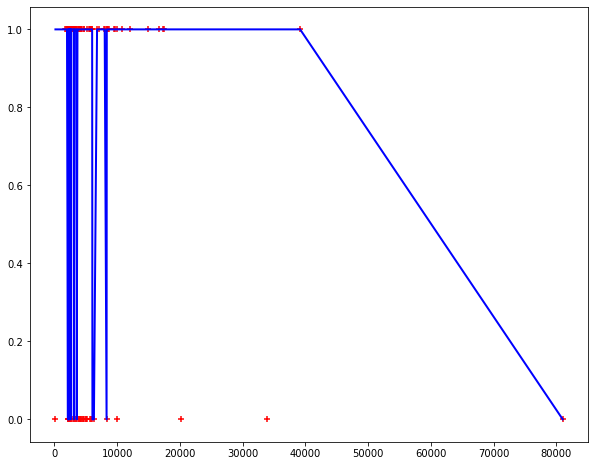

In [27]:
plt.rcParams['figure.figsize'] = (10,8)

df = pd.DataFrame({'ApplicantIncome': X_test['ApplicantIncome'], 'Correto': y_test, 'Predito': y_pred})
df = df.sort_values(by=['ApplicantIncome'])

plt.scatter(df['ApplicantIncome'], df['Correto'], color='red', marker='+')
plt.plot(df['ApplicantIncome'], df['Predito'], color='blue', linewidth=2)
plt.show()

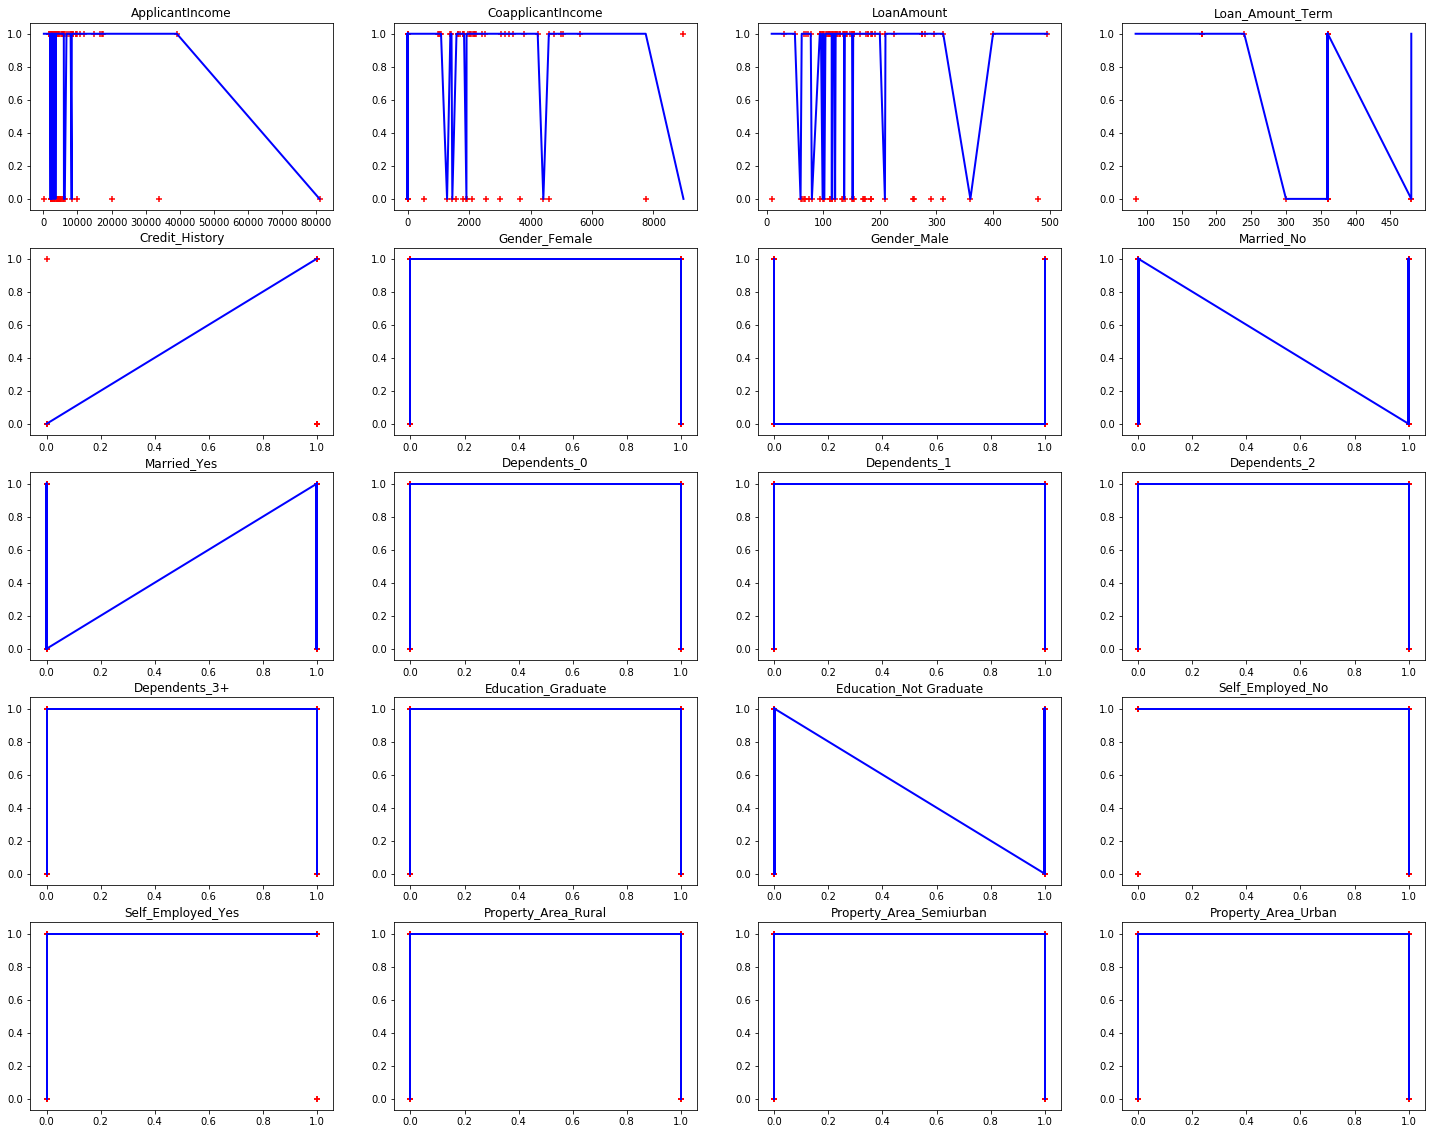

In [28]:
plt.rcParams['figure.figsize'] = (25,20)

for i, e in enumerate(X_test.columns):
    df = pd.DataFrame({e: X_test[e], 'Correto': y_test, 'Predito': y_pred})
    df = df.sort_values(by=[e])
    ax = plt.subplot(5, 4, i+1)
    ax.scatter(df[e], df['Correto'], color='red', marker='+')
    ax.plot(df[e], df['Predito'], color='blue', linewidth=2)
    ax.set_title(str(e))
plt.show()